In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
data=pd.read_csv("50_Startups.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '50_Startups.csv'

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data[data.isnull()].sum()

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State                0
Profit             0.0
dtype: object

In [8]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


## correlation Check

In [10]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

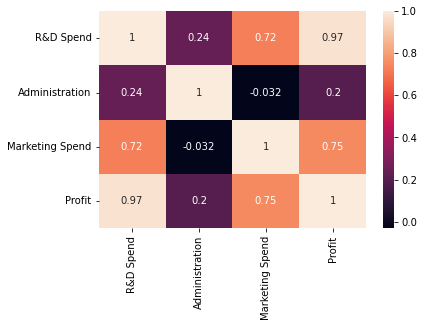

In [15]:
sns.heatmap(data=data.corr(),annot=True)

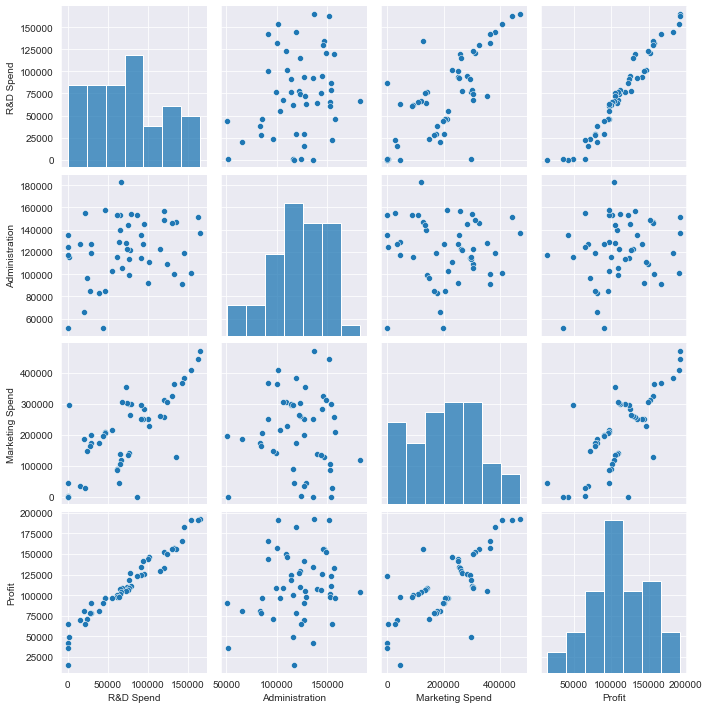

In [16]:
sns.set_style(style="darkgrid")
sns.pairplot(data=data)

## Model Building

In [21]:
data=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [22]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data).fit()

In [23]:
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [25]:
model.tvalues,model.pvalues

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    1.057379e-09
 RDS          2.634968e-22
 ADMS         6.017551e-01
 MKTS         1.047168e-01
 dtype: float64)

In [26]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

## Building SLR Models

In [39]:
model_MKTS=smf.ols("Profit~MKTS",data=data).fit()

In [40]:
model_MKTS.tvalues,model_MKTS.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [32]:
model_ADMS=smf.ols("Profit~ADMS",data=data).fit()

In [33]:
model_ADMS.tvalues,model_ADMS.pvalues

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [41]:
model_R_A=smf.ols("Profit~MKTS+ADMS",data=data).fit()

In [42]:
model_R_A.tvalues,model_R_A.pvalues

(Intercept    1.142741
 MKTS         8.281039
 ADMS         2.467779
 dtype: float64,
 Intercept    2.589341e-01
 MKTS         9.727245e-11
 ADMS         1.729198e-02
 dtype: float64)

In [ ]:
# calculating VIF

In [55]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=data).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data).fit().rsquared
vif_m=1/(1-rsq_m)

print(vif_r,vif_a,vif_m)

2.4689030699947017 1.1750910070550458 2.3267732905308773


In [ ]:
# All VIF are less than 20, so taking all variables in model

## Residual Analysis

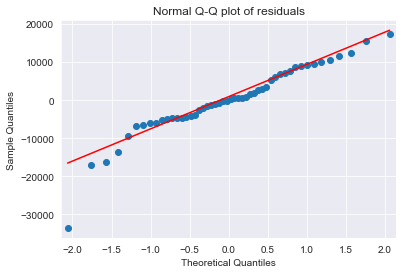

In [56]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Residual Plot for Homoscedasticity

In [58]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

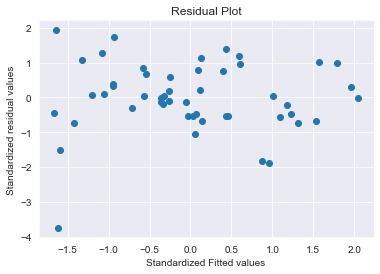

In [59]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

eval_env: 1


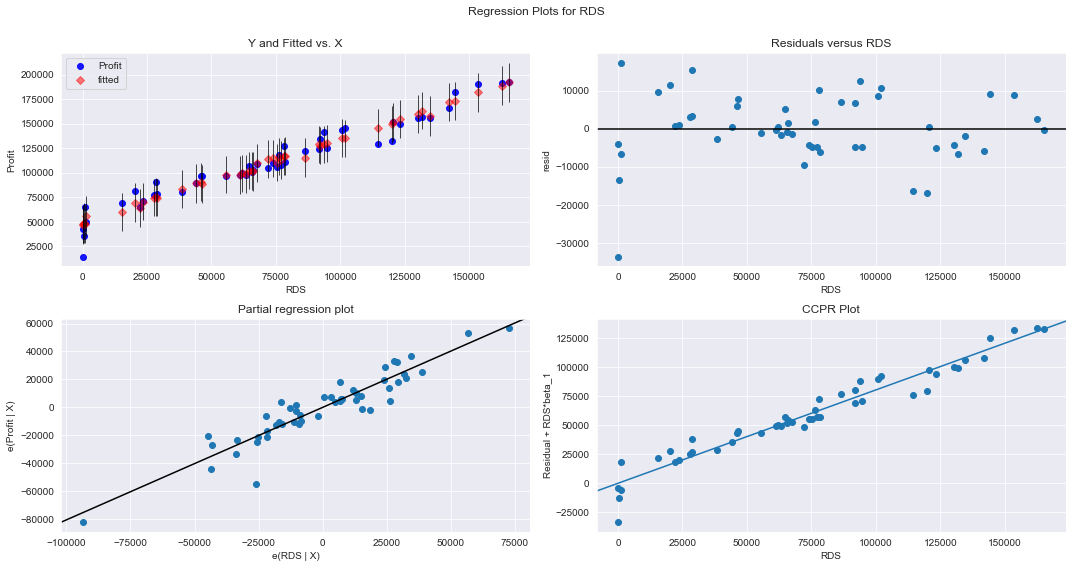

In [60]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


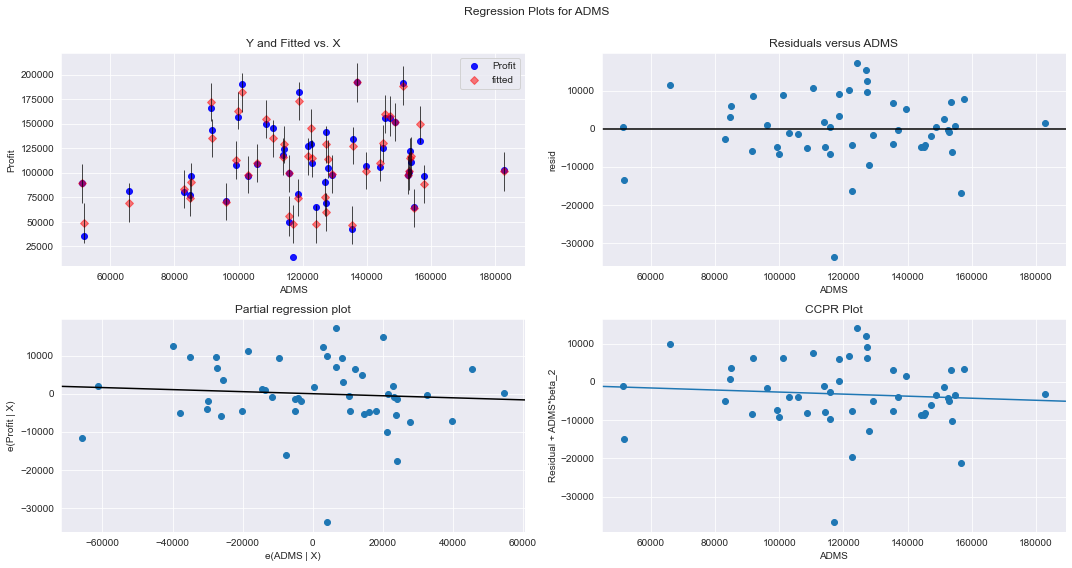

In [61]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


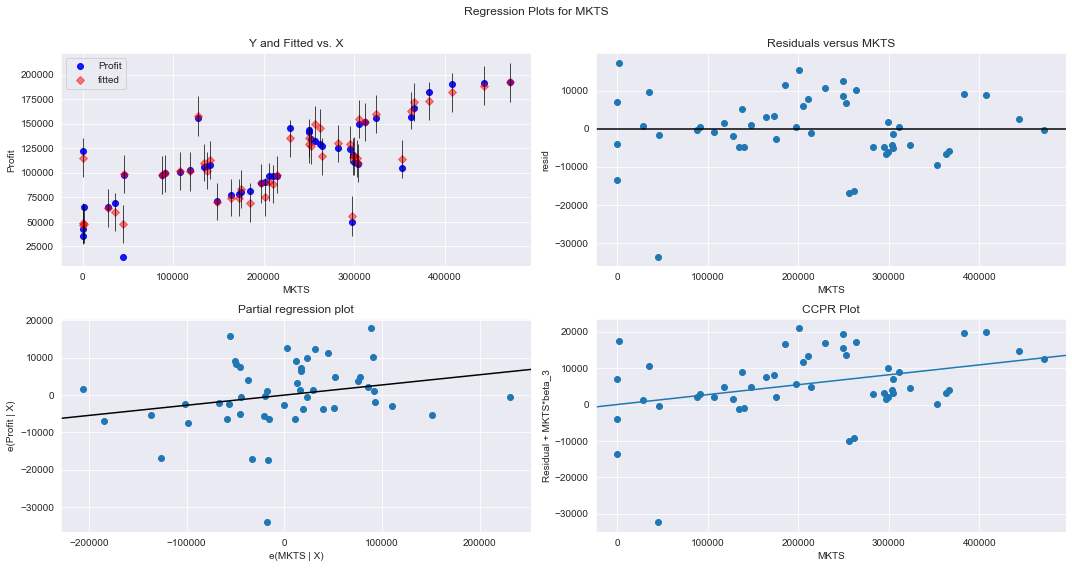

In [62]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

# Model Deletion Diagnostics

## Cook’s Distance

In [65]:
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

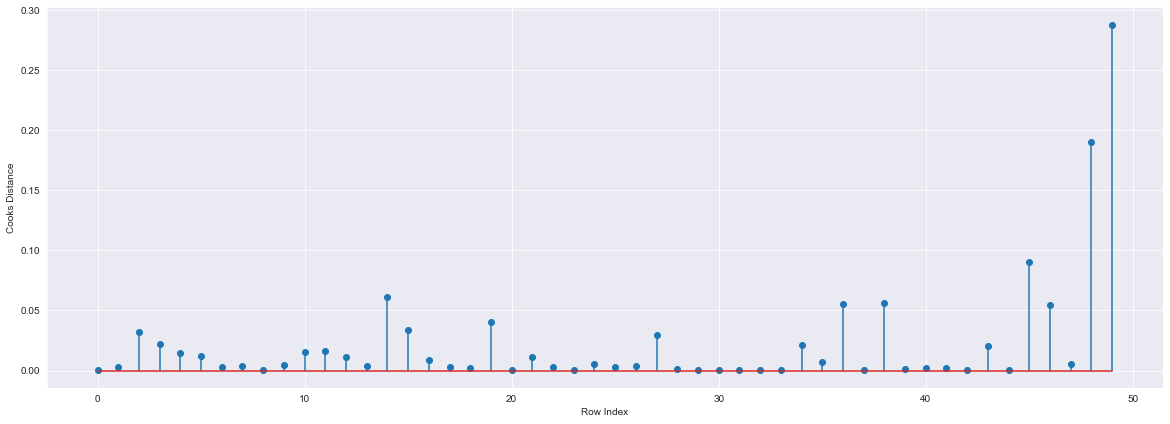

In [66]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

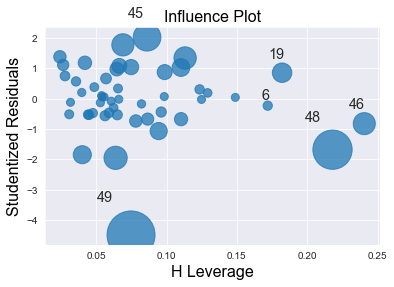

In [68]:
influence_plot(model)
plt.show()

In [70]:
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [71]:
data[data.index.isin([49])] 

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [75]:
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [78]:
New_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()
New_model.rsquared , New_model.aic
print("Thus model accuracy is improved to",New_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


# New model Prediction

In [79]:
new_data=pd.DataFrame({'RDS':142107.34,"ADMS":91391.77,"MKTS":366168.42},index=[0])
new_data

,RDS,ADMS,MKTS
0,142107.34,91391.77,366168.42


In [81]:
New_model.predict(new_data)

0    170863.486721
dtype: float64

In [84]:
pred_y=New_model.predict(data1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [93]:
prediction=pd.DataFrame()
prediction["RDS"]=data["RDS"]
prediction["ADMS"]=data["ADMS"]
prediction["MKTS"]=data["MKTS"]
prediction["Profit"]=data["Profit"]
prediction["Y Pred"]=pred_y
prediction


,RDS,ADMS,MKTS,Profit,Y Pred
0,165349.20,136897.80,471784.10,192261.83,190716.676999
1,162597.70,151377.59,443898.53,191792.06,187537.122227
2,153441.51,101145.55,407934.54,191050.39,180575.526396
3,144372.41,118671.85,383199.62,182901.99,172461.144642
4,142107.34,91391.77,366168.42,166187.94,170863.486721
5,131876.90,99814.71,362861.36,156991.12,162582.583177
6,134615.46,147198.87,127716.82,156122.51,157741.338633
7,130298.13,145530.06,323876.68,155752.60,159347.735318
8,120542.52,148718.95,311613.29,152211.77,151328.826941
9,123334.88,108679.17,304981.62,149759.96,154236.846778


## R^2 value for each prepared model

In [95]:
d1={'Models':['Model','New_Model'],'Rsquared':[model.rsquared,New_model.rsquared]}
R_squ=pd.DataFrame(d1)
R_squ

,Models,Rsquared
0,Model,0.950746
1,New_Model,0.961316
